In [1]:
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.dates import MonthLocator, DateFormatter

In [22]:
fires = gpd.read_file('/home/sg/Downloads/81286d0b2248482e94068e255d85e6c3/81286d0b2248482e94068e255d85e6c3.shp')

In [23]:
fires

,id,initialdat,finaldate,area_ha,iso2,iso3,country,admlvl1,admlvl2,admlvl3,...,other_natu,agricultur,artificial,other_perc,natura2k_p,noneu,updated,area_code,eu_area,geometry
0,1607,2010-08-17,2010-08-17,103,EL,GRC,Ελλάδα,Κεντρική Ελλάδα,Ιόνια Νησιά,Ζάκυνθος,...,0.000000,0.000000,0.0,0.0,0.000000,0,2022-01-26,EU,EU,"POLYGON ((5278450.148 1694362.416, 5278768.928..."
1,1608,2010-08-16,2010-08-16,231,EL,GRC,Ελλάδα,"Νησιά Αιγαίου, Κρήτη",Νότιο Αιγαίο,"Άνδρος, Θήρα, Κέα, Μήλος, Μύκονος, Νάξος, Πάρο...",...,50.655022,0.000000,0.0,0.0,89.323084,0,2022-01-26,EU,EU,"POLYGON ((5598079.286 1717168.590, 5598269.122..."
2,1385,2010-07-28,2010-07-28,653,EL,GRC,Ελλάδα,"Νησιά Αιγαίου, Κρήτη",Βόρειο Αιγαίο,"Ικαρία, Σάμος",...,0.000000,33.898305,0.0,0.0,6.696395,0,2022-01-26,EU,EU,"POLYGON ((5805401.169 1794753.636, 5805258.490..."
3,4256,2010-08-20,2010-08-20,24,EL,GRC,Ελλάδα,Κεντρική Ελλάδα,Στερεά Ελλάδα,Φθιώτιδα,...,0.000000,0.000000,0.0,0.0,0.000000,0,2022-01-26,EU,EU,"POLYGON ((5468947.953 1826899.134, 5469120.486..."
4,4257,2010-08-26,2010-08-26,61,EL,GRC,Ελλάδα,Κεντρική Ελλάδα,Πελοπόννησος,"Λακωνία, Μεσσηνία",...,0.000000,5.172414,0.0,0.0,0.000000,0,2022-01-26,EU,EU,"POLYGON ((5438946.540 1606082.623, 5439150.636..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1225,217565,2023-07-25,2023-07-25,46,EL,GRC,Ελλάδα,"Νησιά Αιγαίου, Κρήτη",Νότιο Αιγαίο,"Κάλυμνος, Κάρπαθος – Ηρωική Νήσος Κάσος, Κως, ...",...,0.000000,45.098039,0.0,0.0,0.000000,0,2023-07-31,EU,EU,"POLYGON ((5943782.466 1650081.513, 5943825.271..."
1226,217993,2023-07-27,2023-07-28,97,EL,GRC,Ελλάδα,Βόρεια Ελλάδα,Ήπειρος,"Άρτα, Πρέβεζα",...,13.131313,0.000000,0.0,0.0,0.000000,0,2023-08-01,EU,EU,"POLYGON ((5262160.668 1863848.183, 5262192.162..."
1227,217994,2023-08-01,2023-08-01,7,EL,GRC,Ελλάδα,Κεντρική Ελλάδα,Ιόνια Νησιά,"Ιθάκη, Κεφαλληνία",...,0.000000,42.857143,0.0,0.0,0.000000,0,2023-08-01,EU,EU,"POLYGON ((5249595.596 1734333.105, 5249647.912..."
1228,217941,2023-07-30,2023-07-31,87,EL,GRC,Ελλάδα,"Νησιά Αιγαίου, Κρήτη",Βόρειο Αιγαίο,Χίος,...,91.860465,0.000000,0.0,0.0,99.933976,0,2023-08-01,EU,EU,"POLYGON ((5714616.576 1856221.892, 5714638.096..."


In [3]:
fires['date'] = pd.to_datetime(fires['initialdat'])
fires.sort_values(by='date', inplace=True)

In [4]:
excluded_months = [1, 2, 3, 4, 10, 11, 12]
filtered_data = fires[~fires['date'].dt.month.isin(excluded_months)].reset_index()

In [5]:
accumulated_burned_area = []
current_year = None
cumulative_burned_area = 0

for index, row in filtered_data.iterrows():
    date = row['date']
    burned_area = row['area_ha']
    
    # Check if the year has changed, if so, reset the cumulative burned area
    if current_year != date.year:
        current_year = date.year
        cumulative_burned_area = 0
    
    # Update the cumulative burned area for the current date
    cumulative_burned_area += burned_area
    accumulated_burned_area.append(cumulative_burned_area)

# Add the accumulated burned area as a new column in the GeoDataFrame
filtered_data['accumulated_burned_area'] = accumulated_burned_area

In [6]:
filtered_data['year'] = filtered_data['date'].dt.year
fires_grouped = filtered_data[['initialdat','date','accumulated_burned_area','year']].groupby('date').max().reset_index()

In [7]:
grouped_data = fires_grouped.groupby('year')

In [8]:
for year, group in grouped_data:
    print(group.columns)
    break

Index(['date', 'initialdat', 'accumulated_burned_area', 'year'], dtype='object')


In [9]:
fires_grouped.to_csv('accumulated_fires.csv')

In [17]:
group

,date,initialdat,accumulated_burned_area,year
469,2023-05-25,2023-05-25,17,2023
470,2023-05-29,2023-05-29,27,2023
471,2023-07-06,2023-07-06,321,2023
472,2023-07-10,2023-07-10,322,2023
473,2023-07-14,2023-07-14,665,2023
474,2023-07-15,2023-07-15,666,2023
475,2023-07-17,2023-07-17,17762,2023
476,2023-07-18,2023-07-18,36390,2023
477,2023-07-19,2023-07-19,36735,2023
478,2023-07-21,2023-07-21,36738,2023


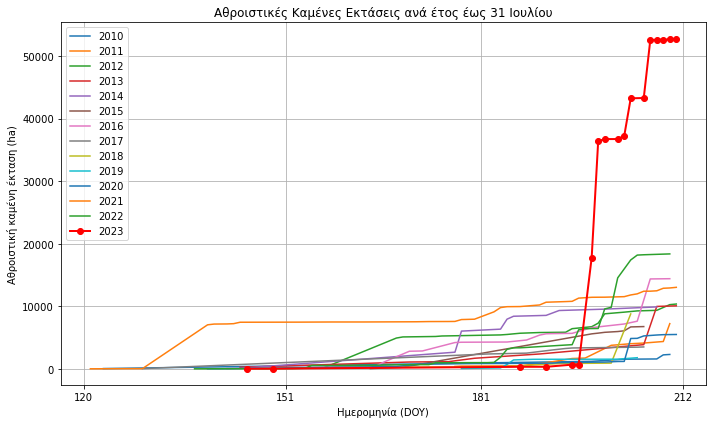

In [20]:
# Step 1: Group the data by year
fires_grouped_sel = fires_grouped[fires_grouped.year>2009]
grouped_data = fires_grouped_sel.groupby('year')

# Step 2: Plot the accumulated burned area for each year on the same plot
plt.figure(figsize=(10, 6))

for year, group in grouped_data:
    # Format the date to show only the month and day (MM-DD)
    #formatted_dates = group['date'].dt.strftime("%m-%d")
    group['doy'] = group['date'].dt.dayofyear
    group = group[group['doy']<212]
    day_of_year = group['date'].dt.dayofyear
    #plt.plot(day_of_year, group['accumulated_burned_area'], label=str(year))
    if year == 2023:
        plt.plot(day_of_year, group['accumulated_burned_area'], label=str(year), marker='o', linestyle='-', linewidth=2, markersize=6, color='red')
    else:
        plt.plot(day_of_year, group['accumulated_burned_area'], label=str(year))


plt.xlabel('Ημερομηνία (DOY)')
plt.ylabel('Αθροιστική καμένη έκταση (ha)')
plt.title('Αθροιστικές Καμένες Εκτάσεις ανά έτος έως 31 Ιουλίου')
plt.legend()

# Set the tick locator for the x-axis to show ticks for each month
plt.gca().xaxis.set_major_locator(MonthLocator())

plt.grid(True)
plt.tight_layout()
plt.show()

In [11]:
fires['year'] = fires['date'].dt.year
fires_2023 = fires[fires.year==2023]

In [12]:
fires_2023 = fires_2023[['id', 'initialdat', 'finaldate', 'area_ha', 'iso2', 'iso3', 'country',
       'admlvl1', 'admlvl2', 'admlvl3', 'admlvl5', 'map_source', 'broadleave',
       'coniferous', 'mixed_fore', 'sclerophil', 'transition', 'other_natu',
       'agricultur', 'artificial', 'other_perc', 'natura2k_p', 'noneu',
       'updated', 'area_code', 'eu_area', 'geometry', 'year']]

In [13]:
kerk = fires_2023[fires_2023.area_ha==1217].to_file('kerk.shp')

/home/sg/miniconda3/envs/fire_ffp/lib/python3.9/site-packages/geopandas/io/file.py:545: UserWarning: You are attempting to write an empty DataFrame to file. For some drivers, this operation may fail.
  _to_file_fiona(df, filename, driver, schema, crs, mode, **kwargs)


In [14]:
fires_2023

,id,initialdat,finaldate,area_ha,iso2,iso3,country,admlvl1,admlvl2,admlvl3,...,agricultur,artificial,other_perc,natura2k_p,noneu,updated,area_code,eu_area,geometry,year
1166,211852,2023-01-04,2023-01-04,2,EL,GRC,Ελλάδα,"Νησιά Αιγαίου, Κρήτη",Κρήτη,Λασίθι,...,0.000000,0.000000,0.0,100.000000,0,2023-01-16,EU,EU,"POLYGON ((5774253.715 1488226.975, 5774267.363...",2023
1167,211853,2023-01-04,2023-01-04,5,EL,GRC,Ελλάδα,"Νησιά Αιγαίου, Κρήτη",Κρήτη,Λασίθι,...,0.000000,0.000000,0.0,100.000000,0,2023-01-16,EU,EU,"POLYGON ((5773894.883 1488410.229, 5773917.914...",2023
1165,211825,2023-01-06,2023-01-07,30,EL,GRC,Ελλάδα,"Νησιά Αιγαίου, Κρήτη",Βόρειο Αιγαίο,"Ικαρία, Σάμος",...,0.000000,3.030303,0.0,100.000000,0,2023-01-10,EU,EU,"POLYGON ((5776514.269 1768193.706, 5776540.870...",2023
1168,211835,2023-01-08,2023-01-08,9,EL,GRC,Ελλάδα,Βόρεια Ελλάδα,Δυτική Μακεδονία,"Γρεβενά, Κοζάνη",...,0.000000,0.000000,0.0,0.000000,0,2023-01-12,EU,EU,"POLYGON ((5301318.790 2002881.025, 5301350.030...",2023
1169,211886,2023-01-18,2023-01-18,1,EL,GRC,Ελλάδα,Κεντρική Ελλάδα,Πελοπόννησος,"Αργολίδα, Αρκαδία",...,0.000000,0.000000,0.0,0.000000,0,2023-01-26,EU,EU,"POLYGON ((5454493.720 1718552.550, 5454511.412...",2023
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1226,217993,2023-07-27,2023-07-28,97,EL,GRC,Ελλάδα,Βόρεια Ελλάδα,Ήπειρος,"Άρτα, Πρέβεζα",...,0.000000,0.000000,0.0,0.000000,0,2023-08-01,EU,EU,"POLYGON ((5262160.668 1863848.183, 5262192.162...",2023
1229,218037,2023-07-28,2023-07-28,9,EL,GRC,Ελλάδα,Βόρεια Ελλάδα,Κεντρική Μακεδονία,Πέλλα,...,11.111111,0.000000,0.0,100.000000,0,2023-08-02,EU,EU,"POLYGON ((5344963.634 2050592.209, 5344987.372...",2023
1224,217924,2023-07-29,2023-07-29,27,EL,GRC,Ελλάδα,Κεντρική Ελλάδα,Δυτική Ελλάδα,Ηλεία,...,70.000000,0.000000,0.0,0.000000,0,2023-08-02,EU,EU,"POLYGON ((5340272.086 1699207.096, 5340271.174...",2023
1228,217941,2023-07-30,2023-07-31,87,EL,GRC,Ελλάδα,"Νησιά Αιγαίου, Κρήτη",Βόρειο Αιγαίο,Χίος,...,0.000000,0.000000,0.0,99.933976,0,2023-08-01,EU,EU,"POLYGON ((5714616.576 1856221.892, 5714638.096...",2023
